C:\Users\Rafae\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1307: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\Users\Rafae\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1308: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\Users\Rafae\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1309: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\Users\Rafae\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1315: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


PH ótimo = 6398.4913 kW
BL máximo ≈ R$ 5.145.575,88


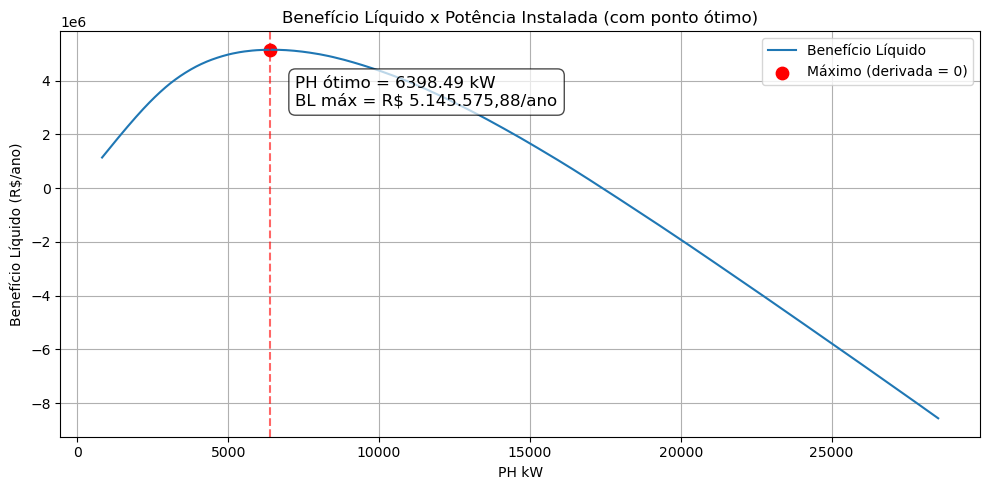

Gráfico salvo em: Gráficos\grafico_beneficio_liquido.png


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import locale

# ================================
# Ajustar locale para formatação BR
# ================================
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
except:
    # fallback caso Windows não tenha pt_BR
    locale.setlocale(locale.LC_ALL, '')

# ================================
# 1) Ler a planilha
# ================================
arquivo = "Curva.xlsx"
sheet = "Plan1"

df = pd.read_excel(arquivo, sheet_name=sheet)

# ================================
# 2) Selecionar colunas
# ================================
titulo = "Benefício Líquido x Potência Instalada (com ponto ótimo)"
x = df.loc[1:1076, "PH kW"].astype(float).values
y = df.loc[1:1076, "Beneficio liquido (BLi) - R$/ano"].astype(float).values

# ================================
# 3) Derivada numérica
# ================================
dy = np.gradient(y, x)

# ================================
# 4) Localizar a mudança de sinal (máximo)
# ================================
mudanca_sinal = np.where(np.diff(np.sign(dy)) < 0)[0]

if len(mudanca_sinal) > 0:
    idx = mudanca_sinal[0]
else:
    raise ValueError("Não houve mudança de sinal da derivada na série.")

x_otimo = x[idx]
y_otimo = y[idx]

# Formatando como moeda brasileira
y_otimo_br = locale.currency(y_otimo, grouping=True, symbol=True)

print(f"PH ótimo = {x_otimo:.4f} kW")
print(f"BL máximo ≈ {y_otimo_br}")

# ================================
# 5) Plotar o gráfico + ponto ótimo + texto
# ================================
plt.figure(figsize=(10,5))
plt.plot(x, y, linewidth=1.5, label="Benefício Líquido")

plt.scatter(x_otimo, y_otimo, color="red", s=80, label="Máximo (derivada = 0)")
plt.axvline(x_otimo, color="red", linestyle="--", alpha=0.6)

offset_y = (max(y) - min(y)) * 0.07
offset_x = (max(x) - min(x)) * 0.03

plt.text(
    x_otimo + offset_x,
    y_otimo - offset_y,
    f"PH ótimo = {x_otimo:.2f} kW\nBL máx = {y_otimo_br}/ano",
    fontsize=12,
    color="black",
    verticalalignment="top",
    bbox=dict(
        facecolor='white',
        edgecolor='black',
        boxstyle='round,pad=0.4',
        alpha=0.7
    )
)

plt.xlabel("PH kW")
plt.ylabel("Benefício Líquido (R$/ano)")
plt.title(titulo)
plt.grid(True)
plt.legend()
plt.tight_layout()

# ================================
# 6) Criar pasta e salvar gráfico
# ================================
pasta = "Gráficos"
os.makedirs(pasta, exist_ok=True)

caminho_arquivo = os.path.join(pasta, "grafico_beneficio_liquido.png")

plt.savefig(caminho_arquivo, dpi=300)
plt.show()

print(f"Gráfico salvo em: {caminho_arquivo}")
